## Pytorch 入门

Pytorch 使用动态图， 每一步都会重新计算，而然后作为输入，传递给下一步，比较适合研究
TensorFlow 使用静态图，相当于定义好了计算图，然后再输入数据，计算图就会动态的计算出结果，以后的版本也兼容动态图，1，2版本完全不兼容，更适合工程实践


In [6]:
# GPU加速
import torch
import time

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.mps.is_available())
a = torch.randn(10000, 1000)
b = torch.randn(1000, 2000)

t0 = time.time()
c = torch.matmul(a, b)
t1 = time.time()
print(a.device, t1 - t0, c.norm(2))

device = torch.device('mps')  # for apple silicon mps, for nvidia cuda
a = a.to(device)
b = b.to(device)

t0 = time.time()
c = torch.matmul(a, b)
t2 = time.time()
print(a.device, t2 - t0, c.norm(2))

t0 = time.time()
c = torch.matmul(a, b)
t2 = time.time()
print(a.device, t2 - t0, c.norm(2))

2.1.2
False
True
cpu 0.015101909637451172 tensor(141267.5000)
mps:0 0.0015189647674560547 tensor(141410.6094, device='mps:0')
mps:0 0.00012111663818359375 tensor(141410.6094, device='mps:0')


In [7]:
# 自动求导
# y = a^2x + bx + c
# dy/da = 2ax + b
# dy/db = x
# dy/dc = 1
import torch

from torch import autograd

x = torch.tensor(1.)
a = torch.tensor(1., requires_grad=True)
b = torch.tensor(2., requires_grad=True)
c = torch.tensor(3., requires_grad=True)

y = a ** 2 * x + b * x + c
print('before', a.grad, b.grad, c.grad)
grads = autograd.grad(y, [a, b, c])
print('after', grads[0], grads[1], grads[2])

before None None None
after tensor(2.) tensor(1.) tensor(1.)


In [ ]:
# 常用网络层， 用来堆叠网络结构
 

## 回归问题

梯度下降算法
求导
极小值

### 梯度下降算法的定义

y = x^2
求y取最小值时，x的值
f(x)=x - y`/x` * a
也就是x-函数y的导数，乘以一个学习率，就是下一步的x值
学习率越小，越精确，但是越慢
学习率越大，越快，但是越不精确
eg:
set a = 0.2
set x = 5 # 随机设置一个x值，当前位置
step1: 5 - 0.2 * 2 * 5 = 3
step2: 3 - 0.2 * 2 * 3 = 1.2
step3: 1.2 - 0.2 * 2 * 1.2 = 0.48
step4: 0.48 - 0.2 * 2 * 0.48 = 0.192
step5: 0.192 - 0.2 * 2 * 0.192 = 0.0768
step6: 0.0768 - 0.2 * 2 * 0.0768 = 0.03072
step7: 0.03072 - 0.2 * 2 * 0.03072 = 0.012288
step8: 0.012288 - 0.2 * 2 * 0.012288 = 0.0049152
step9: 0.0049152 - 0.2 * 2 * 0.0049152 = 0.00196608
... 一直循环下去，直到x的值不变了，或者一直在一个值附近抖动，就是最小值了


In [26]:
# 梯度下降算法的实现(二次函数)
# y = x^2
# f(x) = x - y`/x` * a
# f(x) = x - 2x * a
x = 5
learning_rate = 0.2 # 如果过大会导致错过最优解或在最优解之间不断波动
pre_x = x
current_x = x
for i in range(1000):
    pre_x = current_x
    grad = 2 * x
    x = x - learning_rate * grad
    current_x = x
    y = x ** 2
    print(f"step= {i + 1}, x= {x:.30f}, 'y = {y:.40f}'")
    if abs(pre_x - current_x) < 0.1 ** 30:
        break
# closed form solution

step= 1, x= 3.000000000000000000000000000000, 'y = 9.0000000000000000000000000000000000000000'
step= 2, x= 1.799999999999999822364316059975, 'y = 3.2399999999999993249844010279048234224319'
step= 3, x= 1.079999999999999849009668650979, 'y = 1.1663999999999996592947582030319608747959'
step= 4, x= 0.647999999999999909405801190587, 'y = 0.4199039999999998884483431993430713191628'
step= 5, x= 0.388799999999999923439020221849, 'y = 0.1511654399999999287551588622591225430369'
step= 6, x= 0.233279999999999931858951640606, 'y = 0.0544195583999999704660766042252362240106'
step= 7, x= 0.139967999999999953564255861238, 'y = 0.0195910410239999860371185036456154193729'
step= 8, x= 0.083980799999999966587438393617, 'y = 0.0070527747686399940366119842849457199918'
step= 9, x= 0.050388479999999978564684255389, 'y = 0.0025389989167103979052220186218846720294'
step= 10, x= 0.030233087999999984363252991670, 'y = 0.0009140396100157430593971530363717192813'
step= 11, x= 0.018139852799999987842394233439, 'y

## Noise

噪声 loss ，eps

y = w * x + b + e

loss = (wx + b - y)^2
求y的最小值，也就是求y等于wx+b
损失函数，高斯噪声
求w和b的值

凸函数
Linear Regression 连续的值
Logistic Regression 压缩函数，将负无穷和正无穷压缩到0-1的范围
Classification 分类问题，所有的概率加起来为1



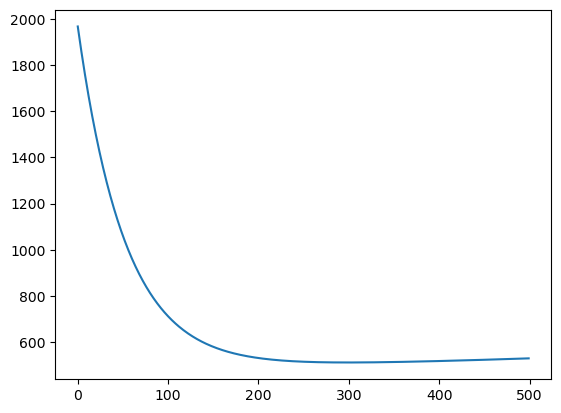

y = 2.405*x + 36.963


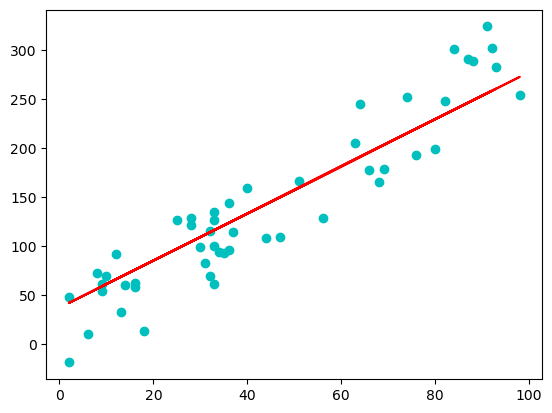

In [31]:
# 一元线性回归的简单示例，计算损失函数
import numpy as np
import matplotlib.pyplot as plt
x = [34, 82, 76, 14, 66, 30, 68, 13, 56, 64, 98, 80, 33, 36, 36, 92, 18,37, 91, 33, 44, 32,  2, 16, 28, 35, 10, 47, 93,  9,  9, 74, 84, 69, 33, 88, 33, 28, 31, 51, 32,  2,  6, 25, 12, 16, 87,  8, 63, 40]
y = [94, 248, 193, 60, 177, 99, 165, 33, 128, 245, 254, 199, 126, 96, 144, 302, 13, 114, 324, 61, 108, 115, 48, 58, 121, 93, 69, 109, 283, 61, 54, 252, 301, 179, 135, 289, 100, 128, 83, 166, 69, -19, 10, 126, 92, 62, 291, 72, 205, 159]
x = np.array(x) # 转换为ndarray数据类型
y = np.array(y) # 转换为ndarray数据类型

def J(x,y,w,b): # 代价函数
    m = len(x) # 数量
    dif = w*x+b - y # 真实值和预测值的差
    dif_2 = dif*dif # 真实值和预测值的差的平方
    return np.sum(dif_2)/(2*m) # 真实值和预测值的差的平方和，再取平均值

def gradientDescent(x,y,w,b,alpha,iterations): # 梯度下降
    m = len(x) # 数量
    cost = [] # 保存代价函数求的值
    for i in range(iterations):
        w = w - alpha*(np.sum(w*x+b-y)/m) # 梯度下降法更新w
        b = b - alpha*(np.sum((w*x+b-y)*x)/m) # 梯度下降法更新b
        cost.append(J(x,y,w,b)) # 代价函数求的值存储到cost列表中
    return w,b,cost

# w和b先随便取一个值，通过梯度下降算法逐渐找到最接近的值
result = gradientDescent(x,y,2,1,0.0001,500)

plt.plot(np.arange(500), result[2]) # 折线图
plt.show()

print(f"y = {result[0]:.3f}*x + {result[1]:.3f}")
plt.plot(x, result[0]*x+result[1], color='r') # 折线图
plt.scatter(x, y, color='c') # 散点图
plt.show()